In [1]:
#import libries
import csv
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as pty
from textblob import TextBlob
import warnings
# Suppress all warnings
warnings.filterwarnings('ignore')


In [2]:
# Read the dataset and set the first row as the header
df = pd.read_csv('ClimateChange.csv')

In [3]:
df

,User,Username,UTC Date,Tweet,Binders,Permalink,Retweet count,Likes count,Tweet value
0,Shubhangi Wakodikar,@ShubhangiWakod1,6/8/2023 22:34:11,#SaveSoil #SaveSoilMovement\n@cpsavesoil\n@Sad...,NaN,https://www.twitter.com/user/status/1688317574...,0,0,0.18
1,Joy finds hope,@joyfindshope,6/8/2023 22:34:01,"Yes, it's good news. We are on the right track...",NaN,https://www.twitter.com/user/status/1688317531...,0,0,0.03
2,Shubhangi Wakodikar,@ShubhangiWakod1,6/8/2023 22:33:46,#SaveSoil #SaveSoilMovement\n@cpsavesoil\n@Sad...,NaN,https://www.twitter.com/user/status/1688317466...,0,0,0.18
3,Daniel Davison,@ClimateClamor,6/8/2023 22:29:44,Reductions in SO2 emissions from container shi...,NaN,https://www.twitter.com/user/status/1688316454...,0,0,0.01
4,Peter D Carter,@PCarterClimate,6/8/2023 22:26:04,RECORD HEAT KILLS CORALS FLORIDA GULF MEXICO\n...,NaN,https://www.twitter.com/user/status/1688315529...,39,47,93.24
...,...,...,...,...,...,...,...,...,...
35002,Shubhangi Wakodikar,@ShubhangiWakod1,6/8/2023 22:35:14,#SaveSoil #SaveSoilMovement\n@cpsavesoil\n@Sad...,NaN,https://www.twitter.com/user/status/1688317838...,0,0,0.18
35003,Shubhangi Wakodikar,@ShubhangiWakod1,6/8/2023 22:34:57,@ishavidhya #SaveSoil #SaveSoilMovement\n@cpsa...,NaN,https://www.twitter.com/user/status/1688317765...,0,0,0.03
35004,Shubhangi Wakodikar,@ShubhangiWakod1,6/8/2023 22:34:49,#SaveSoil #SaveSoilMovement\n@cpsavesoil\n@Sad...,NaN,https://www.twitter.com/user/status/1688317732...,0,0,0.18
35005,Shubhangi Wakodikar,@ShubhangiWakod1,6/8/2023 22:34:31,@SadhguruJV #SaveSoil #SaveSoilMovement\n@cpsa...,NaN,https://www.twitter.com/user/status/1688317656...,0,0,0.03


In [4]:
def get_sentiment(text):
  analysis = TextBlob(text)
  
  if analysis.sentiment.polarity > 0: 
    return 'positive'

  else:
    return 'negative'
  
df['Sentiment'] = df['Tweet'].apply(get_sentiment)

In [5]:
#Print the DataFrame to view the result
df

,User,Username,UTC Date,Tweet,Binders,Permalink,Retweet count,Likes count,Tweet value,Sentiment
0,Shubhangi Wakodikar,@ShubhangiWakod1,6/8/2023 22:34:11,#SaveSoil #SaveSoilMovement\n@cpsavesoil\n@Sad...,NaN,https://www.twitter.com/user/status/1688317574...,0,0,0.18,positive
1,Joy finds hope,@joyfindshope,6/8/2023 22:34:01,"Yes, it's good news. We are on the right track...",NaN,https://www.twitter.com/user/status/1688317531...,0,0,0.03,positive
2,Shubhangi Wakodikar,@ShubhangiWakod1,6/8/2023 22:33:46,#SaveSoil #SaveSoilMovement\n@cpsavesoil\n@Sad...,NaN,https://www.twitter.com/user/status/1688317466...,0,0,0.18,positive
3,Daniel Davison,@ClimateClamor,6/8/2023 22:29:44,Reductions in SO2 emissions from container shi...,NaN,https://www.twitter.com/user/status/1688316454...,0,0,0.01,negative
4,Peter D Carter,@PCarterClimate,6/8/2023 22:26:04,RECORD HEAT KILLS CORALS FLORIDA GULF MEXICO\n...,NaN,https://www.twitter.com/user/status/1688315529...,39,47,93.24,positive
...,...,...,...,...,...,...,...,...,...,...
35002,Shubhangi Wakodikar,@ShubhangiWakod1,6/8/2023 22:35:14,#SaveSoil #SaveSoilMovement\n@cpsavesoil\n@Sad...,NaN,https://www.twitter.com/user/status/1688317838...,0,0,0.18,positive
35003,Shubhangi Wakodikar,@ShubhangiWakod1,6/8/2023 22:34:57,@ishavidhya #SaveSoil #SaveSoilMovement\n@cpsa...,NaN,https://www.twitter.com/user/status/1688317765...,0,0,0.03,positive
35004,Shubhangi Wakodikar,@ShubhangiWakod1,6/8/2023 22:34:49,#SaveSoil #SaveSoilMovement\n@cpsavesoil\n@Sad...,NaN,https://www.twitter.com/user/status/1688317732...,0,0,0.18,positive
35005,Shubhangi Wakodikar,@ShubhangiWakod1,6/8/2023 22:34:31,@SadhguruJV #SaveSoil #SaveSoilMovement\n@cpsa...,NaN,https://www.twitter.com/user/status/1688317656...,0,0,0.03,positive


In [6]:
#extract the two columns needed for my analysis
df_new = df[['Tweet', 'Sentiment']]

In [7]:
df_new

,Tweet,Sentiment
0,#SaveSoil #SaveSoilMovement\n@cpsavesoil\n@Sad...,positive
1,"Yes, it's good news. We are on the right track...",positive
2,#SaveSoil #SaveSoilMovement\n@cpsavesoil\n@Sad...,positive
3,Reductions in SO2 emissions from container shi...,negative
4,RECORD HEAT KILLS CORALS FLORIDA GULF MEXICO\n...,positive
...,...,...
35002,#SaveSoil #SaveSoilMovement\n@cpsavesoil\n@Sad...,positive
35003,@ishavidhya #SaveSoil #SaveSoilMovement\n@cpsa...,positive
35004,#SaveSoil #SaveSoilMovement\n@cpsavesoil\n@Sad...,positive
35005,@SadhguruJV #SaveSoil #SaveSoilMovement\n@cpsa...,positive


In [8]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35007 entries, 0 to 35006
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Tweet      35007 non-null  object
 1   Sentiment  35007 non-null  object
dtypes: object(2)
memory usage: 547.1+ KB


In [9]:
# check for duplication in my dataset

df_new.duplicated().sum()

1712

In [10]:
#drop duplication

df_new.drop_duplicates(keep ='first', inplace = True)

In [11]:
#sanity check
df_new.duplicated().sum()

0

In [12]:
#check for NAN values
df_new['Sentiment'].isna().sum()

0

In [13]:
df_new['Sentiment'] = df_new['Sentiment'].replace({'negative': 0,'positive': 1})

In [14]:
#sanity checks 
df_new

,Tweet,Sentiment
0,#SaveSoil #SaveSoilMovement\n@cpsavesoil\n@Sad...,1
1,"Yes, it's good news. We are on the right track...",1
2,#SaveSoil #SaveSoilMovement\n@cpsavesoil\n@Sad...,1
3,Reductions in SO2 emissions from container shi...,0
4,RECORD HEAT KILLS CORALS FLORIDA GULF MEXICO\n...,1
...,...,...
35000,#SaveSoil #SaveSoilMovement\n@cpsavesoil\n@Sad...,1
35001,@tweetwith_arun #SaveSoil #SaveSoilMovement\n@...,1
35002,#SaveSoil #SaveSoilMovement\n@cpsavesoil\n@Sad...,1
35003,@ishavidhya #SaveSoil #SaveSoilMovement\n@cpsa...,1


#### Exploratory Data Analysis

In [15]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

def wordcloud_create(data_df, sentvalue):
    reviews = df_new[df_new['Sentiment'] == sentvalue]
    words = ' '.join(reviews['Tweet']) 

    wordcloud = WordCloud(stopwords=STOPWORDS,
                          background_color='black',
                          width=2995,
                          height=2510).generate(words)

    plt.figure(1, figsize=(13, 13))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

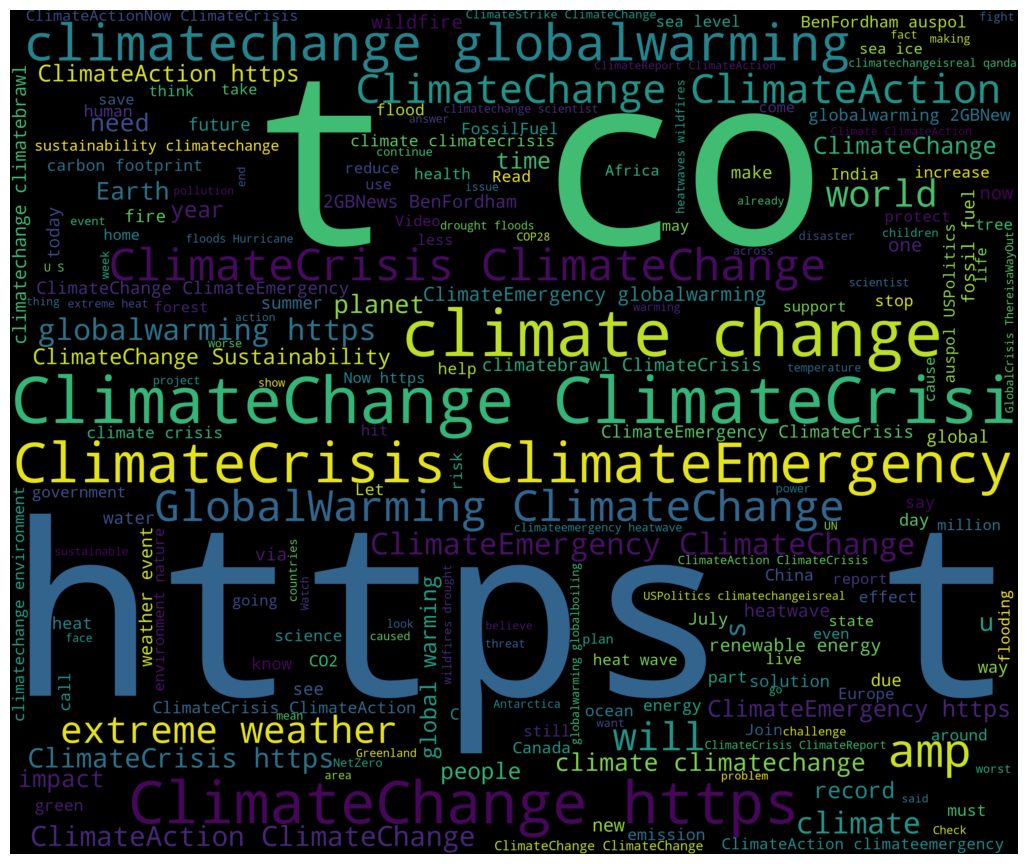

In [16]:
#show the negative reviews
wordcloud_create(df_new, 0)

- Some of the negative words observed are flood, less, extreme weather, cause and others

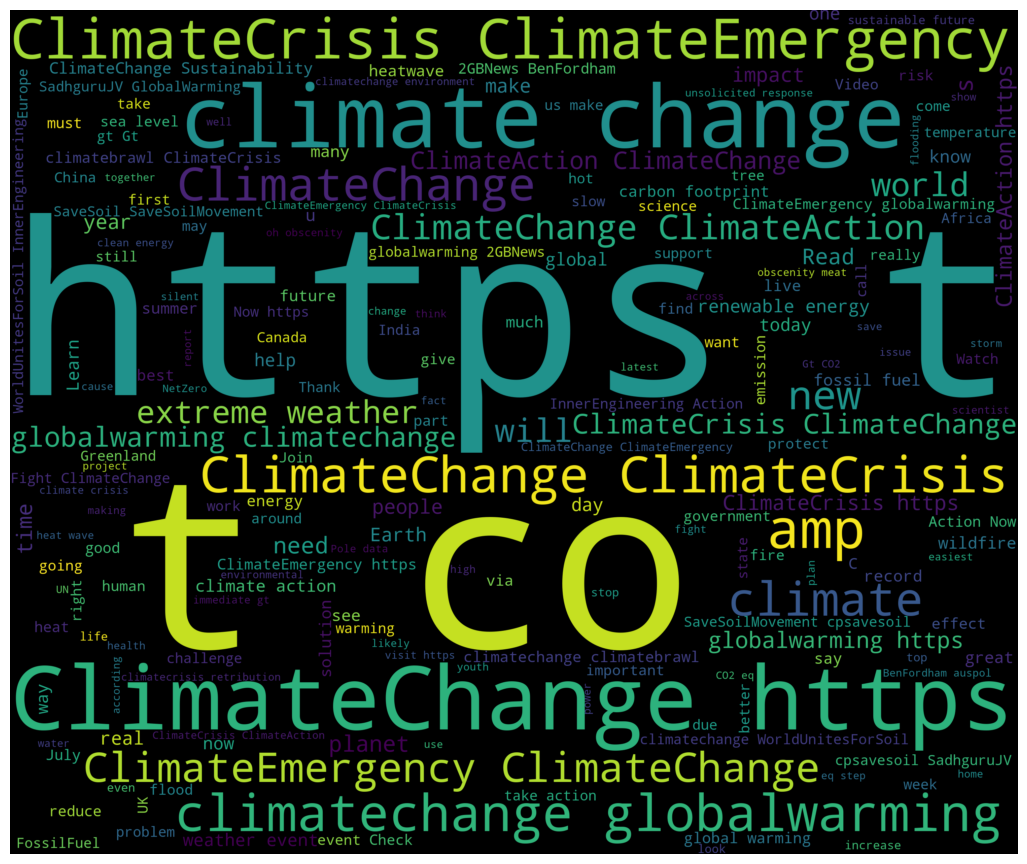

In [17]:
#show the positive reviews
wordcloud_create(df_new, 1)

- Some positive words are sustainability, great, protect and others

In [18]:
# check the labels of my dataframe
df_new['Sentiment'].value_counts()

Sentiment
0    17335
1    15960
Name: count, dtype: int64

In [19]:
# plotting the distribution of the labelled class

def plot_bar(df_new, feature):
    plot = sns.countplot(x=feature, data=df_new)

    # calculating the length of the total data
    total_data = len(df_new)

    # Display the percentage on top of each bar
    for p in plot.patches:
        height = p.get_height()
        plot.text(p.get_x() + p.get_width() / 2., height + 3, f'{height / total_data:.2%}', ha="center")

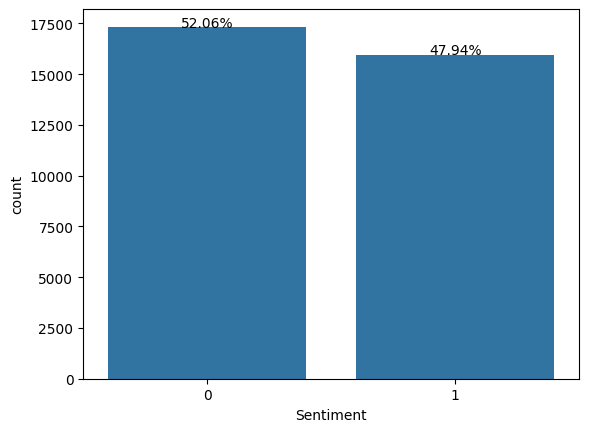

In [20]:
plot_bar(df_new, 'Sentiment')

- The variation or difference between the classes are not much hence there will be no need for data balancing

### Data Pre-processing

#### HTML Tags Removal

In [21]:
from bs4 import BeautifulSoup

# Define a function to remove HTML tags from text
def remove_html_tags(html_text):
    if isinstance(html_text, str):  # Check if the element is a string
        soup = BeautifulSoup(html_text, 'html.parser')
        text = soup.get_text()
        return text
    else:
        return html_text  # Return the original value if it's not a string



# Apply the remove_html_tags function to the 'Sentiment' column
df_new['Tweet'] = df_new['Tweet'].apply(remove_html_tags)

In [22]:
df_new

,Tweet,Sentiment
0,#SaveSoil #SaveSoilMovement\n@cpsavesoil\n@Sad...,1
1,"Yes, it's good news. We are on the right track...",1
2,#SaveSoil #SaveSoilMovement\n@cpsavesoil\n@Sad...,1
3,Reductions in SO2 emissions from container shi...,0
4,RECORD HEAT KILLS CORALS FLORIDA GULF MEXICO\n...,1
...,...,...
35000,#SaveSoil #SaveSoilMovement\n@cpsavesoil\n@Sad...,1
35001,@tweetwith_arun #SaveSoil #SaveSoilMovement\n@...,1
35002,#SaveSoil #SaveSoilMovement\n@cpsavesoil\n@Sad...,1
35003,@ishavidhya #SaveSoil #SaveSoilMovement\n@cpsa...,1


#### Fix Contraction

In [23]:
import contractions

# Define a function to apply the contraction fix
def fix_contractions(text):
    return contractions.fix(text)

# Apply the contraction fix to the 'review' column
df_new['Tweet'] = df_new['Tweet'].apply(fix_contractions)

#### Tokenization

In [24]:
import nltk
nltk.download('punkt')

df_new['Tweet'] = df_new.apply(lambda row: nltk.word_tokenize(row['Tweet']), axis = 1)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


#### Remove the Digits

In [25]:
def digit_remove(row):
    tokens = [word for word in row if not word.isdigit()]
    return tokens
df_new['Tweet'] = df_new['Tweet'].apply(lambda x: digit_remove(x))

#### Remove Non-Ascii Character 

In [26]:
import unicodedata
def non_ascii_removal(row):
    row_new = []
    for word in row:
        word_new = unicodedata.normalize('NFKD', word).encode('ascii','ignore').decode('utf-8', 'ignore')
        row_new.append(word_new)
    return row_new
df_new['Tweet'] = df_new['Tweet'].apply(lambda x: non_ascii_removal(x))
df_new.head()

,Tweet,Sentiment
0,"[#, SaveSoil, #, SaveSoilMovement, @, cpsaveso...",1
1,"[Yes, ,, it, is, good, news, ., We, are, on, t...",1
2,"[#, SaveSoil, #, SaveSoilMovement, @, cpsaveso...",1
3,"[Reductions, in, SO2, emissions, from, contain...",0
4,"[RECORD, HEAT, KILLS, CORALS, FLORIDA, GULF, M...",1


#### Remove Punctuations

In [27]:
import string
def removeRuntuaction(row):
    tokens = [word for word in row if word not in string.punctuation]
    return tokens
df_new['Tweet'] = df_new['Tweet'].apply(lambda x: removeRuntuaction (x))

#### Lowercasing

In [28]:
def lowercase(row):
    words_rows = [word.lower()for word in row]
    return words_rows
df_new['Tweet'] = df_new['Tweet'].apply(lambda x: lowercase (x))

#### Stopwords removals

In [29]:
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')


words_stop = stopwords.words('english')

def removestopwords(row):
    words = [word for word in row if word not in words_stop]
    return words
df_new['Tweet'] = df_new['Tweet'].apply(lambda x: removestopwords(x))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


#### Lemmatization

In [30]:
import nltk
nltk.download('wordnet')

from nltk.stem import PorterStemmer, WordNetLemmatizer

lem = WordNetLemmatizer()

def words_lemmatize(row):
    words = [lem.lemmatize(word) for word in row]
    return words
df_new['Tweet'] = df_new['Tweet'].apply(lambda x: words_lemmatize(x))

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


#### Regular Expression Application

In [31]:
import re

def word_join(row):
    words = ' '.join([word for word in row])
    words = re.sub('[^a-zA-Z]', ' ', words)  # Changed '2' to 'Z' in the regex pattern
    return words  # Return the modified 'words' variable

df_new['Tweet'] = df_new['Tweet'].apply(lambda x: word_join(x))

In [32]:
#check the first 5 rows to be sure that the data is clean
df_new.head(5)

,Tweet,Sentiment
0,savesoil savesoilmovement cpsavesoil sadhguruj...,1
1,yes good news right track reducing emission ao...,1
2,savesoil savesoilmovement cpsavesoil sadhguruj...,1
3,reduction so emission container ship last yea...,0
4,record heat kill coral florida gulf mexico cor...,1


#### Vectorization

In [33]:
# vectorization (text conversion to numbers)
from sklearn.feature_extraction.text import CountVectorizer

# Keep only 500 words
vec_count = CountVectorizer(max_features=500)

result_df = vec_count.fit_transform(df_new['Tweet'])

#feature conversion to arrays

result_df = result_df.toarray()

#### Select features

In [34]:
x = result_df
y = df_new['Sentiment']

#### Supervised learning

In [35]:
# Splitting of data

from sklearn.model_selection import train_test_split

#split the data
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 0)

#### Random Forest on Bag of Words

In [36]:
#import the library
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state = 0, n_jobs = -1)

#### Model training

In [37]:
#train the model

rf.fit(x_train, y_train)

RandomForestClassifier(n_jobs=-1, random_state=0)

#### Confussion Metrix and Classification report

In [38]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

def score_metrics(actual, predicted):
    labels = ['negative','positive']  
    print(classification_report(actual, predicted, target_names=labels))
    cm = confusion_matrix(actual, predicted)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='.2f', xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')

              precision    recall  f1-score   support

    negative       0.75      0.84      0.79      3423
    positive       0.80      0.70      0.75      3236

    accuracy                           0.77      6659
   macro avg       0.78      0.77      0.77      6659
weighted avg       0.78      0.77      0.77      6659



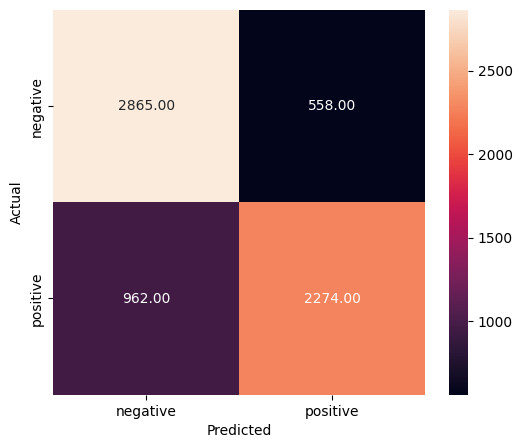

In [39]:
#make prediction

y_pred = rf.predict(x_test)

#check the metrics

score_metrics(y_test, y_pred)

#### Randomforest with Balanced Data

In [40]:
#import SMOTE library
from imblearn.over_sampling import SMOTE

In [41]:
sm = SMOTE(random_state = 0) #instance of SMOTE

In [42]:
#feature and target performance
x_sm,y_sm = sm.fit_resample(x,y)

In [43]:
# data spliting into training and testing

from sklearn.model_selection import train_test_split

#split the data
x_train_1, x_test_1, y_train_1, y_test_1 = train_test_split(x_sm,y_sm, test_size = 0.2, random_state = 0)

In [44]:
rf_1 = RandomForestClassifier(random_state = 0, n_jobs = -1)

In [45]:
rf_1.fit(x_train_1, y_train_1) #train the model

RandomForestClassifier(n_jobs=-1, random_state=0)

In [46]:
#make predictions
y_pred_1 = rf_1.predict(x_test_1)

              precision    recall  f1-score   support

    negative       0.75      0.78      0.76      3516
    positive       0.76      0.73      0.75      3418

    accuracy                           0.75      6934
   macro avg       0.75      0.75      0.75      6934
weighted avg       0.75      0.75      0.75      6934



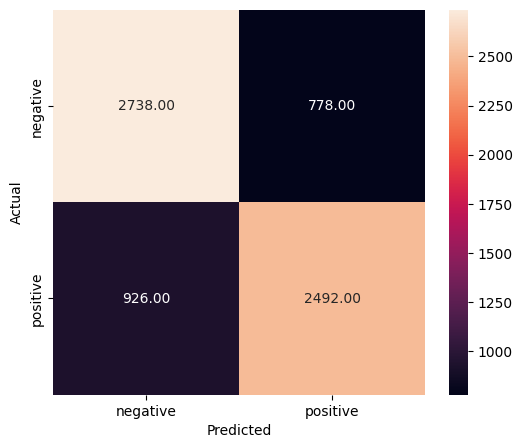

In [47]:
score_metrics(y_test_1, y_pred_1)

- The model with unbalanced data performed better that performed better hence will continue with the unbalanced data

#### Word vetctorization instatiation

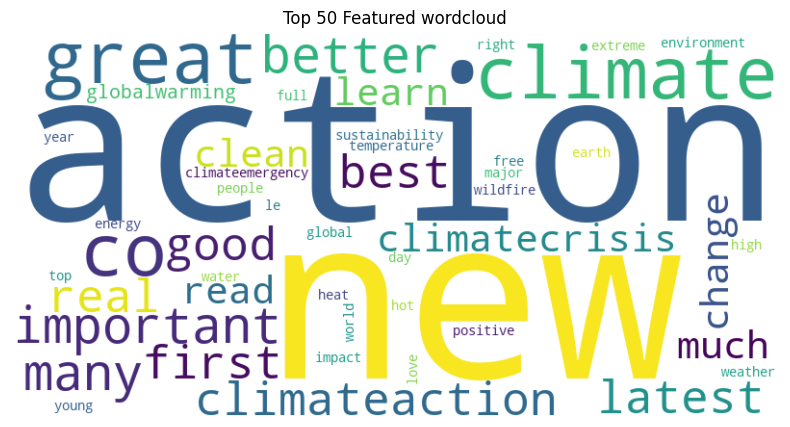

In [48]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def get_top50_words(model, all_features):
    topfeature = ''
    feat = model.feature_importances_
    feature = sorted(range(len(feat)), key=lambda k: feat[k], reverse=True)[:50]
    for i in feature:
        topfeature += all_features[i]
        topfeature += ' '
    
    wordcloud = WordCloud(background_color='white', colormap='viridis', width=800, height=400).generate(topfeature)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title('Top 50 Featured wordcloud')
    plt.axis('off')
    plt.show()

# Call the function with the appropriate parameters
features = vec_count.get_feature_names_out()
get_top50_words(rf, features)

- Some of the words observed are action, new, great, change, better, important, weather, clean,heat, good, latest, first, sustainability and others

#### Barchat plot

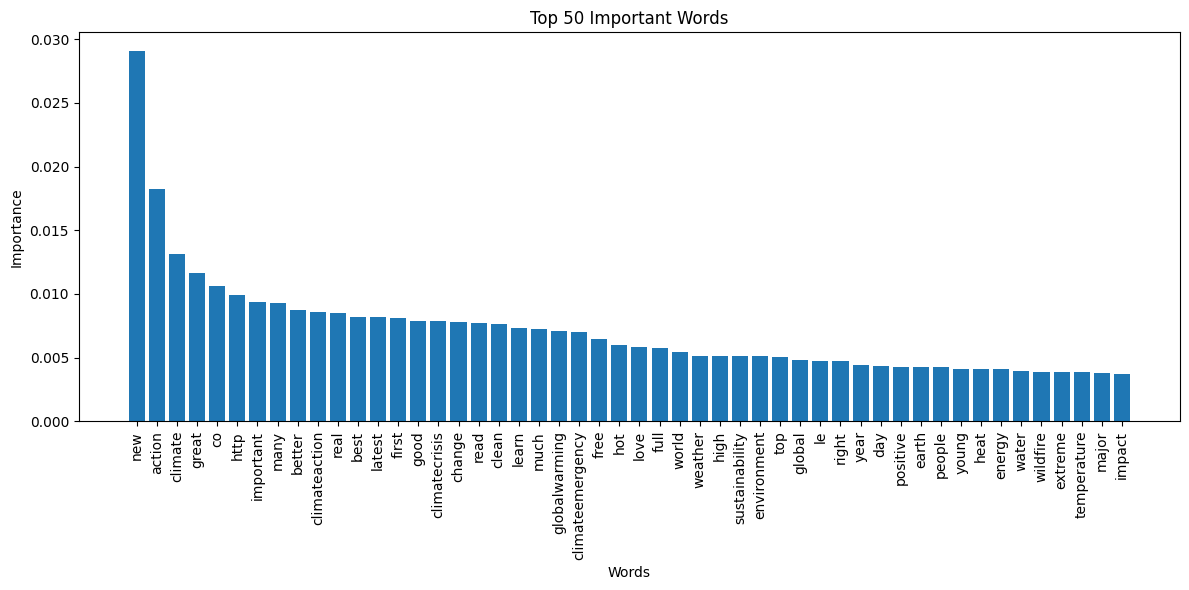

In [49]:
def get_top50_words(model, all_features):
    feat_importance = model.feature_importances_
    sorted_idx = feat_importance.argsort()[::-1]
    
    top_features = [all_features[idx] for idx in sorted_idx[:50]]
    top_importances = feat_importance[sorted_idx][:50]

    return top_features, top_importances

features = vec_count.get_feature_names_out()
top_features, top_importances = get_top50_words(rf, features)

plt.figure(figsize=(12, 6))
plt.bar(top_features, top_importances)
plt.xticks(rotation=90)
plt.xlabel('Words')
plt.ylabel('Importance')
plt.title('Top 50 Important Words')
plt.tight_layout()
plt.show()

- Words like new, action, climate and great contributes more. we also have other words like important, better ,latest and other s that contributed to the model

#### GradientBoosting on Bag Of Words

In [50]:
#import the library
from sklearn.ensemble import GradientBoostingClassifier

In [51]:
gb = GradientBoostingClassifier(random_state=0)

In [52]:
gb.fit(x_train, y_train) # train the model

GradientBoostingClassifier(random_state=0)

              precision    recall  f1-score   support

    negative       0.69      0.91      0.78      3423
    positive       0.85      0.56      0.68      3236

    accuracy                           0.74      6659
   macro avg       0.77      0.73      0.73      6659
weighted avg       0.77      0.74      0.73      6659



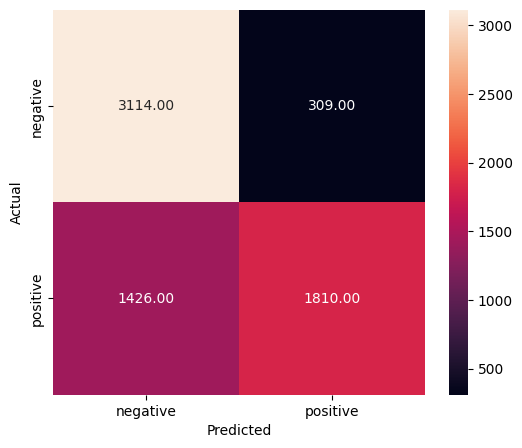

In [53]:
# make predictions
y_pred_gb = gb.predict(x_test)

score_metrics(y_test,y_pred_gb)


#### RandoModel with Pretrained word2vec embeddings - SkipGram

In [54]:
#extract out sentences from the data
list_word = [sentence.split() for sentence in df_new['Tweet']]

In [55]:
# create an instance of word2vec
#import word2vec libraries
from gensim.models import Word2Vec
word2vec_model = Word2Vec(list_word, sg = 1)

In [56]:
# Vocabularies Extractions
vocab_1 = word2vec_model.wv.key_to_index

In [57]:
#get the lenght of words
len(vocab_1)

10331

In [58]:
# top Similar by words with 'great'
word2vec_model.wv.similar_by_word('climate')

[('response', 0.5941954255104065),
 ('change', 0.5589776635169983),
 ('physical', 0.5501118302345276),
 ('yaleclimatecomm', 0.5391842126846313),
 ('complexity', 0.5361160635948181),
 ('perception', 0.5279114246368408),
 ('uncertainty', 0.5268390774726868),
 ('inevitable', 0.5252065062522888),
 ('jimbair', 0.5242366790771484),
 ('regarding', 0.5213790535926819)]

- Change, inevitatble, physical, respinse and others shown above are the words trained together with climate


In [59]:
def word_vectorizer(model, corpus):
    vocab = set(model.wv.key_to_index)  # extract unique words in the vocabulary 
    word2vec_features = [getwordvec_embeddings(model, tokenized_sentence, vocab) for tokenized_sentence in corpus]
    return np.array(word2vec_features)

def getwordvec_embeddings(model, words, vocab):
    embeddings = []
    for word in words:
        if word in vocab:
            embeddings.append(model.wv[word])  # Use model.wv to access word vectors
    if len(embeddings) == 0:
        # If none of the words in the sentence are in the model's vocabulary, return zeros
        return np.zeros(model.vector_size)
    else:
        # Return the mean of word embeddings for the words in the vocabulary
        return np.mean(embeddings, axis=0)

In [60]:
feature_array = word_vectorizer(model = word2vec_model , corpus = list_word)

In [61]:
feature_array

array([[-0.46730027,  0.6302457 ,  0.43025157, ..., -0.29067987,
         0.44840547, -0.01948181],
       [-0.08531732,  0.3310492 ,  0.01091641, ..., -0.16535915,
         0.14482896, -0.17885016],
       [-0.46730027,  0.6302457 ,  0.43025157, ..., -0.29067987,
         0.44840547, -0.01948181],
       ...,
       [-0.46730027,  0.6302457 ,  0.43025157, ..., -0.29067987,
         0.44840547, -0.01948181],
       [-0.5068914 ,  0.72238433,  0.50657016, ..., -0.33891407,
         0.50296724,  0.01223639],
       [-0.45319667,  0.6186795 ,  0.38481444, ..., -0.2713029 ,
         0.43201542,  0.00400718]], dtype=float32)

In [62]:
pd.DataFrame(feature_array)

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,-0.467300,0.630246,0.430252,0.210964,-0.023580,-0.454003,0.616401,0.746305,0.363580,-0.043112,...,0.142648,-0.019753,0.442861,0.151083,0.271681,-0.144272,0.159872,-0.290680,0.448405,-0.019482
1,-0.085317,0.331049,0.010916,0.183938,-0.062461,-0.357783,0.289913,0.405465,-0.023176,-0.094416,...,0.165767,0.049135,0.268889,0.142781,0.208304,-0.074992,-0.057754,-0.165359,0.144829,-0.178850
2,-0.467300,0.630246,0.430252,0.210964,-0.023580,-0.454003,0.616401,0.746305,0.363580,-0.043112,...,0.142648,-0.019753,0.442861,0.151083,0.271681,-0.144272,0.159872,-0.290680,0.448405,-0.019482
3,0.013677,0.327780,-0.023605,0.086541,-0.068035,-0.283947,0.186858,0.429046,-0.029940,-0.038267,...,0.210702,0.042961,0.157591,0.064576,0.218190,0.040282,-0.301721,-0.069596,0.010297,-0.146720
4,0.001617,0.448149,0.049388,0.196042,-0.077986,-0.218982,0.305400,0.462456,-0.088889,-0.144231,...,0.225057,-0.101594,0.179758,0.278043,0.255892,0.045475,-0.260999,-0.089458,0.009128,-0.071879
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33290,-0.467300,0.630246,0.430252,0.210964,-0.023580,-0.454003,0.616401,0.746305,0.363580,-0.043112,...,0.142648,-0.019753,0.442861,0.151083,0.271681,-0.144272,0.159872,-0.290680,0.448405,-0.019482
33291,-0.472582,0.672018,0.476865,0.197328,-0.037684,-0.474863,0.631566,0.775881,0.454016,-0.059702,...,0.184711,0.002550,0.420094,0.200177,0.242859,-0.164651,0.137393,-0.330109,0.470263,0.014255
33292,-0.467300,0.630246,0.430252,0.210964,-0.023580,-0.454003,0.616401,0.746305,0.363580,-0.043112,...,0.142648,-0.019753,0.442861,0.151083,0.271681,-0.144272,0.159872,-0.290680,0.448405,-0.019482
33293,-0.506891,0.722384,0.506570,0.214053,-0.034656,-0.509575,0.679579,0.834187,0.480290,-0.062135,...,0.208010,0.003676,0.458236,0.226420,0.257810,-0.171199,0.149526,-0.338914,0.502967,0.012236


- These are the word2vwc embedinngs

In [63]:
# feature selection
x_word2vec = feature_array
y_word2vec = df_new['Sentiment']

In [64]:
#split my data into training and testing

x_train_word2vec, X_text_word2vec, y_train_word2vec, y_test_word2vec = train_test_split(x_word2vec, y_word2vec, test_size = 0.30, random_state = 0)

In [65]:
word2vec_rf = RandomForestClassifier(random_state = 0) #create and instance of random forest

word2vec_rf.fit(x_train_word2vec, y_train_word2vec) #train the model

RandomForestClassifier(random_state=0)

In [66]:
#prediction
y_pred_word2vec = word2vec_rf.predict(X_text_word2vec)

              precision    recall  f1-score   support

    negative       0.71      0.75      0.73      5194
    positive       0.71      0.67      0.69      4795

    accuracy                           0.71      9989
   macro avg       0.71      0.71      0.71      9989
weighted avg       0.71      0.71      0.71      9989



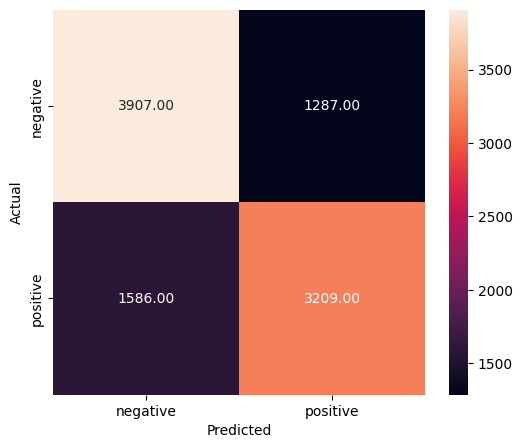

In [67]:
# Evaluate model performance
score_metrics(y_test_word2vec, y_pred_word2vec)

In [68]:
from sklearn.ensemble import RandomForestClassifier

word2vec_rf1 = RandomForestClassifier(
    n_estimators=500,
    max_depth=20,
    min_samples_split=10,
    min_samples_leaf=4,
    max_features='sqrt',
    random_state=0,
    class_weight='balanced',
    criterion='entropy'
)

word2vec_rf1.fit(x_train_word2vec, y_train_word2vec)


RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=20, min_samples_leaf=4, min_samples_split=10,
                       n_estimators=500, random_state=0)

              precision    recall  f1-score   support

    negative       0.73      0.72      0.72      5194
    positive       0.70      0.71      0.70      4795

    accuracy                           0.71      9989
   macro avg       0.71      0.71      0.71      9989
weighted avg       0.71      0.71      0.71      9989



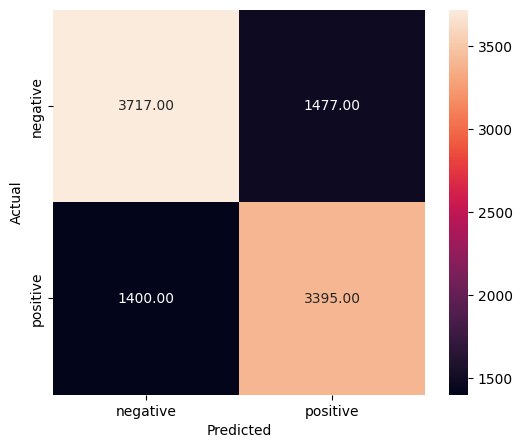

In [71]:
# Evaluate model performance
#prediction
y_pred_word2vec_1 = word2vec_rf1.predict(X_text_word2vec)
score_metrics(y_test_word2vec, y_pred_word2vec_1)

- The result seems to be the same as there is no much improvement

In [70]:
# Further Tunning
from sklearn.ensemble import RandomForestClassifier

word2vec_rf2 = RandomForestClassifier(
    n_estimators=200,
    max_depth=15,
    min_samples_split=5,
    min_samples_leaf=4,
    max_features='sqrt',
    random_state=0,
    class_weight='balanced',
    criterion='entropy'
)

word2vec_rf2.fit(x_train_word2vec, y_train_word2vec)

RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=15, min_samples_leaf=4, min_samples_split=5,
                       n_estimators=200, random_state=0)

              precision    recall  f1-score   support

    negative       0.73      0.69      0.71      5194
    positive       0.68      0.72      0.70      4795

    accuracy                           0.71      9989
   macro avg       0.71      0.71      0.71      9989
weighted avg       0.71      0.71      0.71      9989



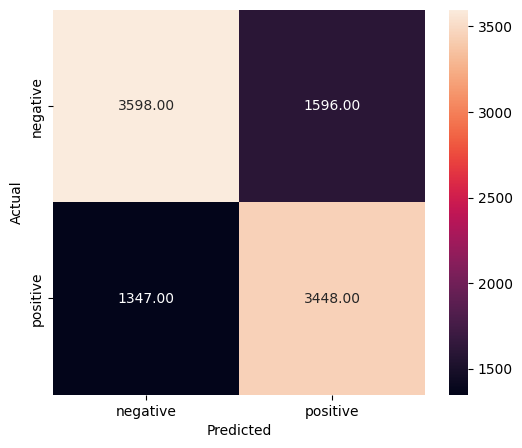

In [72]:
#prediction
y_pred_word2vec_2 = word2vec_rf2.predict(X_text_word2vec)
score_metrics(y_test_word2vec, y_pred_word2vec_2)

- Still got the same result using Random forest after further tunning. We may need to consider other algorithms